<a href="https://colab.research.google.com/github/Kaustubh-Amare/Netflix-movies-and-tv-shows-clustering-ML/blob/main/Netflix_Movies_%26_TV_shows_clustering_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies & TV shows clustering (Unsupervised ML)



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
#neccessary packages
!pip install xplotter --upgrade
!pip install pycountry-convert
!pip install geopy
!pip install folium
!pip install geopandas
###################
import pandas as pd
import numpy as np

import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.cm as cm



%matplotlib inline

# Importing Date & Time util modules
from dateutil.parser import parse

import collections as c


import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Importing Date & Time util modules
from dateutil.parser import parse

import collections as c


# Xplotter
from xplotter.insights import *
from xplotter.formatter import format_spines



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 6.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 217 kB 42.0 MB/s 
     |████████████████████████████████| 316 kB 16.4 MB/s 
     |████████████████████████████████| 298 kB 57.5 MB/s 
     |████████████████████████████████| 297 kB 54.5 MB/s 
     |████████████████████████████████| 297 kB 56.0 MB/s 
     |████████████████████████████████| 297 kB 49.9 MB/s 
     |████████████████████████████████| 296 kB 53.1 MB/s 
     |████████████████████████████████| 296 kB 45.3 MB/s 
     |████████████████████████████████| 280 kB 59.0 MB/s 
     |████████████████████████████████| 280 kB 56.3 MB/s 
     |████████████████████████████████

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
file_path = '/content/drive/MyDrive/DATA_SCI_almabetter/drive_data/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
content_df = pd.read_csv(file_path)


### Dataset First View

In [4]:
# Dataset First Look (head)
content_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# Dataset First Look (tail)
content_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
# shape of data
print('There are',content_df.shape[0],'rows and',content_df.shape[1],'features in given netflix dataset.')
# print('No. of Columns :',content_df.shape[1])

There are 7787 rows and 12 features in given netflix dataset.


### Dataset Information

In [7]:
# Dataset Info
content_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
content_df.duplicated().sum()

0

#### Function for extracting complete information of all columns in data set. Information as follows
* Missing values
* Percentage of missing values
* unique values

In [9]:
# function for determination of null values, uniques values in columns and there features.
def Complete_columns_info(df):
        mis_val =df.isna().sum()
        mis_val_percent = 100 *df.isna().sum() / len(df)
        unique_val= df.nunique()
        cci_table = pd.concat([mis_val, mis_val_percent, unique_val], axis=1)
        cci_table = cci_table.rename(columns = {0 : 'No of Null Values', 1 : '% of null values', 2 : 'No of unique values' })
        cci_table['Data Type'] = df.dtypes
        cci_table = cci_table.sort_values('% of null values', ascending=False).round(1)
        print (" selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]),"rows")
        return cci_table

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
Complete_columns_info(content_df)

 selected dataframe has 12 columns and 7787 rows


,No of Null Values,% of null values,No of unique values,Data Type
director,2389,30.7,4049,object
cast,718,9.2,6831,object
country,507,6.5,681,object
date_added,10,0.1,1565,object
rating,7,0.1,14,object
show_id,0,0.0,7787,object
type,0,0.0,2,object
title,0,0.0,7787,object
release_year,0,0.0,73,int64
duration,0,0.0,216,object


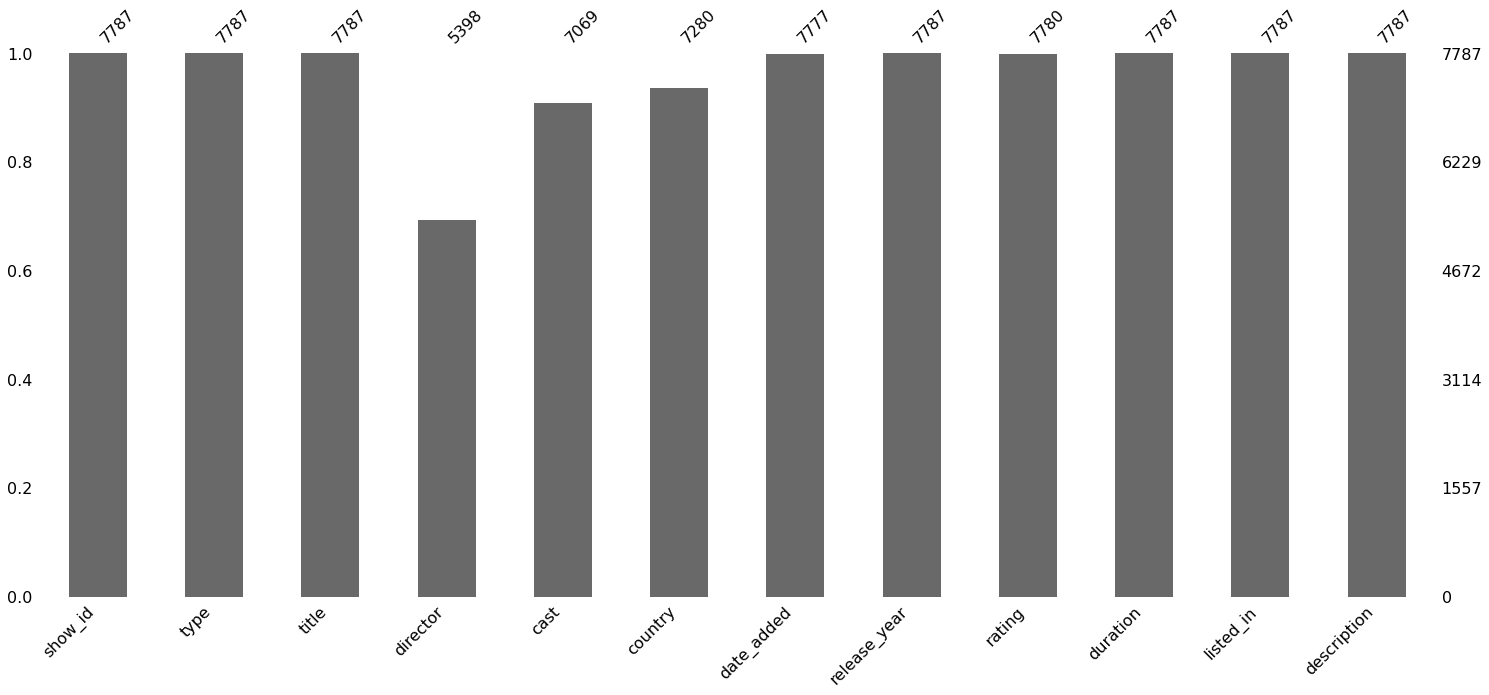

In [11]:
# Visualizing the missing values
msno.bar(content_df)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
content_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
# Dataset Describe
content_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.

> Date time variable conversion

In [16]:
# Create new features to store date, day, month and year seperately :

# First convert date_added to date time format.
content_df["date_added"] = pd.to_datetime(content_df['date_added'])
  
# Compute day. 
content_df['day_added'] = content_df['date_added'].dt.day   

# Compute year.         
content_df['year_added'] = content_df['date_added'].dt.year

# Compute mount.
content_df['month_added'] = content_df['date_added'].dt.month        

> Splitting datasets for movies and tv shows

In [17]:
df_movies = content_df[content_df['type']=='Movie'].copy()
df_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23.0,2016.0,12.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20.0,2018.0,12.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16.0,2017.0,11.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,1.0
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",1.0,2020.0,6.0


In [18]:
df_shows = content_df[content_df['type']=='TV Show'].copy()
df_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14.0,2020.0,8.0
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,1.0,2017.0,7.0
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",30.0,2018.0,11.0
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,2019-05-17,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,17.0,2019.0,5.0
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",20.0,2019.0,3.0


> Duration manipulation

In [19]:
# duration manipulation for movie
df_movies.duration = df_movies.duration.str.replace(' min','').astype(int)

# duration manipulation for tv shows
df_shows.rename(columns={'duration':'seasons'}, inplace=True)
df_shows.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
df_shows.seasons = df_shows.seasons.str.replace(' Seasons','').astype(int)



In [20]:
content_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      5398 non-null   object        
 4   cast          7069 non-null   object        
 5   country       7280 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7780 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
 12  day_added     7777 non-null   float64       
 13  year_added    7777 non-null   float64       
 14  month_added   7777 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int6

In [21]:
# changing dtype to string
content_df['type']= content_df['type'].astype('string')
content_df['title']= content_df['title'].astype('string')
content_df['director']= content_df['director'].astype('string')
content_df['cast']= content_df['cast'].astype('string')
content_df['country']= content_df['country'].astype('string')
content_df['rating']= content_df['rating'].astype('string')
content_df['listed_in']= content_df['listed_in'].astype('string')
content_df['description']= content_df['description'].astype('string')

#####
# content_df['day_added']= content_df['day_added'].astype('int')
# content_df['year_added']= content_df['year_added'].astype('int')
# content_df['month_added']= content_df['month_added'].astype('int')




In [22]:
content_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   string        
 2   title         7787 non-null   string        
 3   director      5398 non-null   string        
 4   cast          7069 non-null   string        
 5   country       7280 non-null   string        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7780 non-null   string        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   string        
 11  description   7787 non-null   string        
 12  day_added     7777 non-null   float64       
 13  year_added    7777 non-null   float64       
 14  month_added   7777 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int6

In [23]:
# fixing data types
custom_rating = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
content_df['ratings_cat'] = content_df['rating'].replace(to_replace = custom_rating)
content_df['ratings_cat'].unique()


array(['Adults', 'Teens', 'Older Kids', 'Kids', <NA>], dtype=object)

In [24]:
content_df['type'] = pd.Categorical(content_df['type'])

# ratings_cat is another category (4 classes)
content_df['ratings_cat'] = pd.Categorical(content_df['ratings_cat'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [25]:
# # Chart - 1 visualization code
# # pie chart for movie and tv show
# labels = ['Movie', 'TV show']
# size = content_df['type'].value_counts()
# colors = plt.cm.Wistia(np.linspace(0, 1, 2))
# explode = [0, 0.1]
# plt.rcParams['figure.figsize'] = (6, 7)
# plt.pie(size,labels=labels, colors = colors,autopct='%1.1f%%', explode = explode, shadow = True, startangle = 90)
# plt.title('Distribution of Type', fontsize = 25)
# plt.legend()
# plt.show()

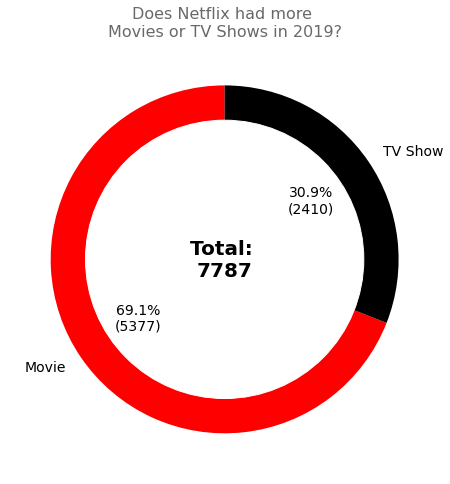

In [26]:
# Balance of Netflix products
plot_donut_chart(df=content_df, col='type', colors=['red','black'], title='Does Netflix had more \nMovies or TV Shows in 2019?')
     


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

Text(0.5, 1.0, 'Rating')

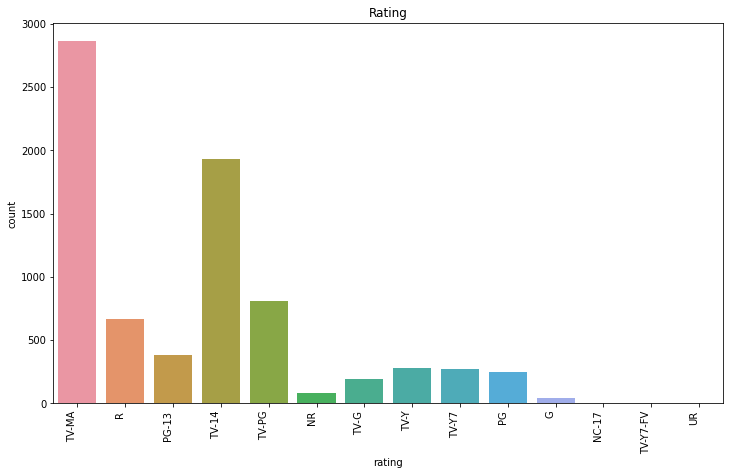

In [27]:
# Chart - 2 visualization code
# count plot for ratings
sns.countplot(content_df['rating'])
sns.countplot(content_df['rating']).set_xticklabels(sns.countplot(content_df['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(12,7)
plt.title('Rating')


Text(0.5, 1.0, 'Rating')

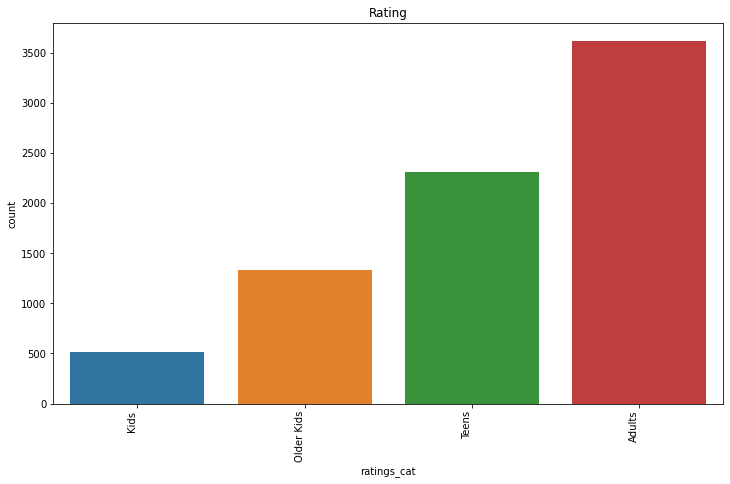

In [28]:
# Chart - 2 visualization code
# count plot for ratings
sns.countplot(content_df['ratings_cat'])
sns.countplot(content_df['ratings_cat']).set_xticklabels(sns.countplot(content_df['ratings_cat']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(12,7)
plt.title('Rating')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

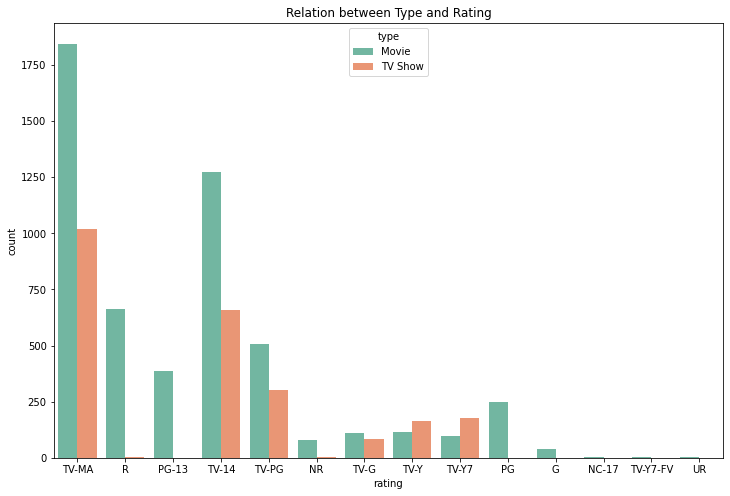

In [29]:
# Chart - 3 visualization code
# graph for different rating on movies and tv shows
plt.figure(figsize=(12,8))
sns.countplot(x='rating',hue='type',data=content_df,palette="Set2")
plt.title('Relation between Type and Rating')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

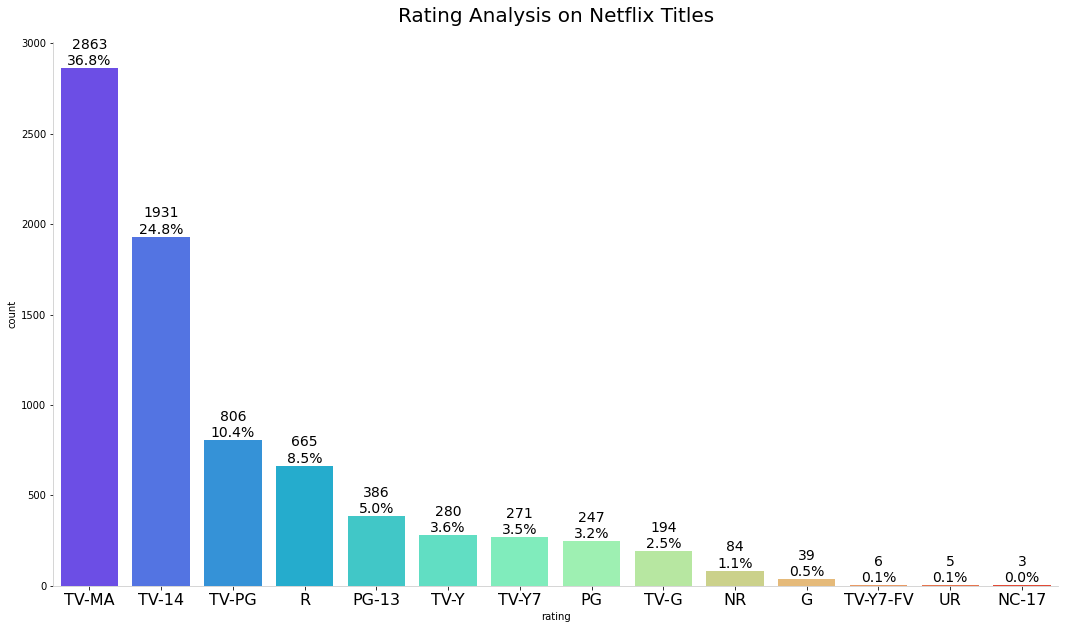

In [30]:
# Chart - 4 visualization code
# Plotting and customizing a rating analysis
plot_countplot(content_df, 'rating', order=True, figsize=(18, 10),
               title='Rating Analysis on Netflix Titles', size_title=20)
plt.xticks(fontsize=16)
plt.show()
     


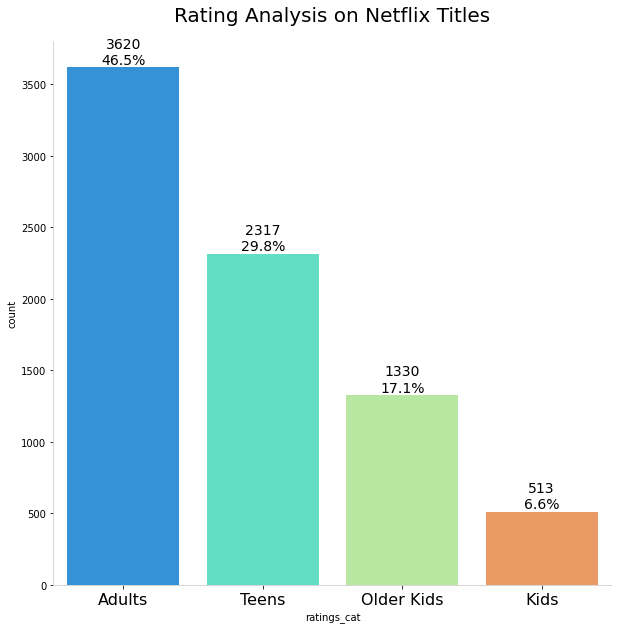

In [31]:
# Chart - 4 visualization code
# Plotting and customizing a rating analysis
plot_countplot(content_df, 'ratings_cat', order=True, figsize=(10, 10),
               title='Rating Analysis on Netflix Titles', size_title=20)
plt.xticks(fontsize=16)
plt.show()
     

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [32]:
# Chart - 5 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

([<matplotlib.patches.Wedge at 0x7faa1cc86640>,
 [Text(-1.0999663543761926, -0.008603443516892913, 'Others'),
  Text(1.1999632956831192, 0.00938557474570121, 'Originals')],
 [Text(-0.5999816478415596, -0.004692787372850679, '50.25%'),
  Text(0.6999785891484862, 0.005474918601659039, '49.75%')])

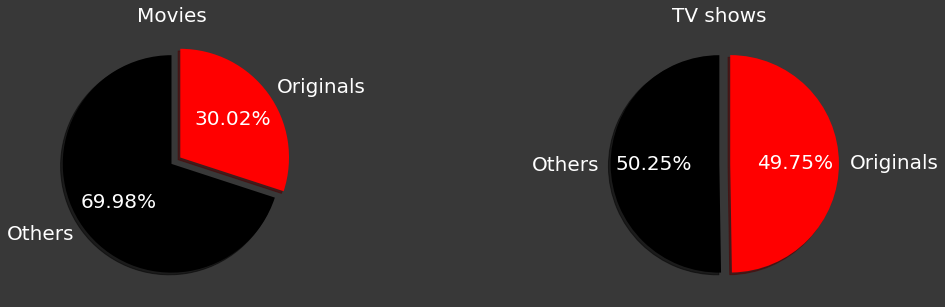

In [33]:
# Chart - 6 visualization code

df_movies['originals'] = np.where(df_movies['release_year'] == df_movies['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize=(18,5),facecolor="#383838")
explode = (0, 0.1)
ax[0].set_title('Movies', color='white', fontsize = 20)
ax[0].pie(df_movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"white", 'fontsize': 20}, colors =['black','red'])
# pie plot showing percentage of originals and others in TV_shows
df_shows['originals'] = np.where(df_shows['release_year'] == df_shows['year_added'], 'Yes', 'No')
ax[1].set_title('TV shows', color='white', fontsize = 20 )
ax[1].pie(df_shows['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"white", 'fontsize': 20}, colors =['black','red'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [34]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8 - Duration

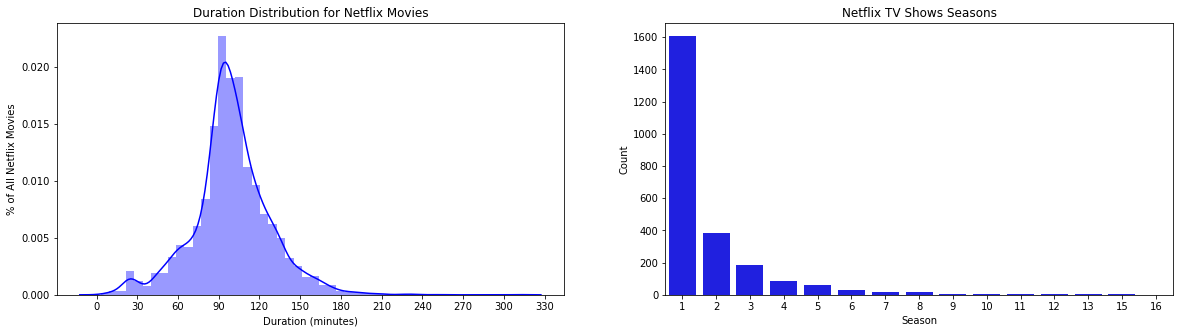

In [35]:
# Chart - 8 visualization code
fig, ax = plt.subplots(1,2, figsize=(20, 5))
g1 = sns.distplot(df_movies.duration, color='blue',ax=ax[0]);
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")
g2 = sns.countplot(df_shows.seasons, color='blue',ax=ax[1]);
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season")
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

Text(0.5, 0, 'Year -> (Movies added to Netflix) ')

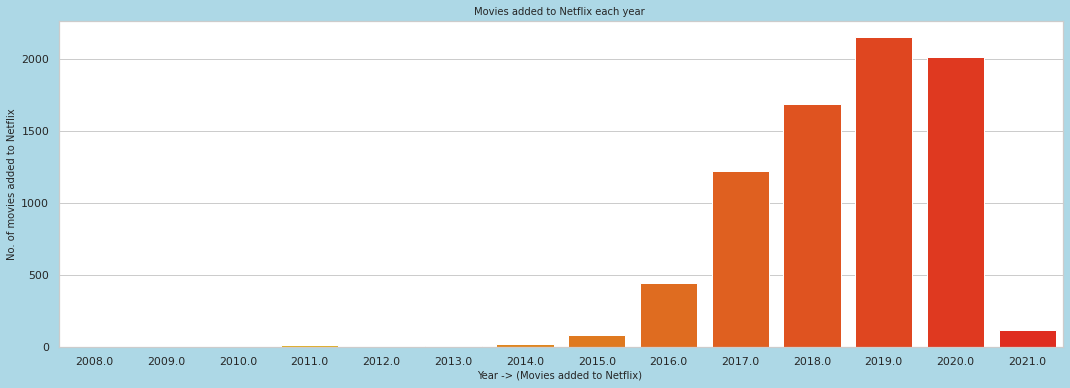

In [36]:
# Chart - 9 visualization code
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
sns.countplot(data = content_df,x = 'year_added',palette ="autumn_r")
plt.title('Movies added to Netflix each year ', fontsize=10)
plt.ylabel('No. of movies added to Netflix', fontsize=10)
plt.xlabel('Year -> (Movies added to Netflix) ', fontsize=10)
     

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

Text(0.5, 0, 'Month -> (Movies added to Netflix) ')

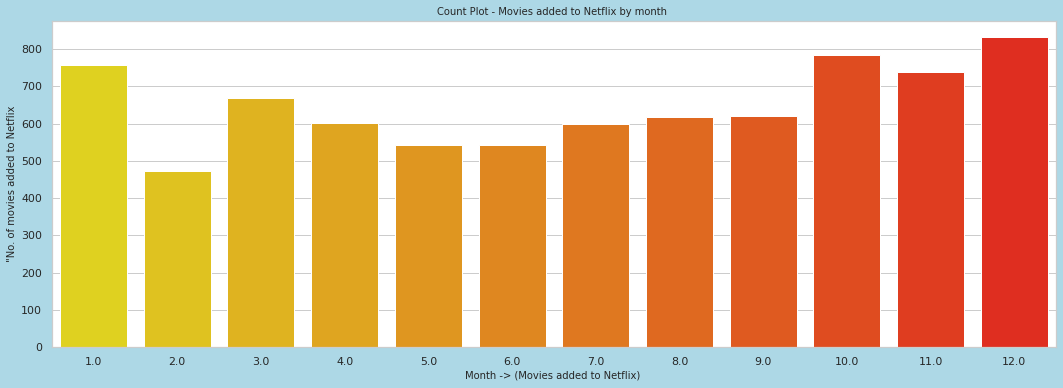

In [37]:
# Chart - 10 visualization code
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
sns.countplot(data=content_df,x = 'month_added',palette ="autumn_r")
plt.title('Count Plot - Movies added to Netflix by month ', fontsize=10)
plt.ylabel('"No. of movies added to Netflix', fontsize=10)
plt.xlabel('Month -> (Movies added to Netflix) ', fontsize=10)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [38]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [39]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

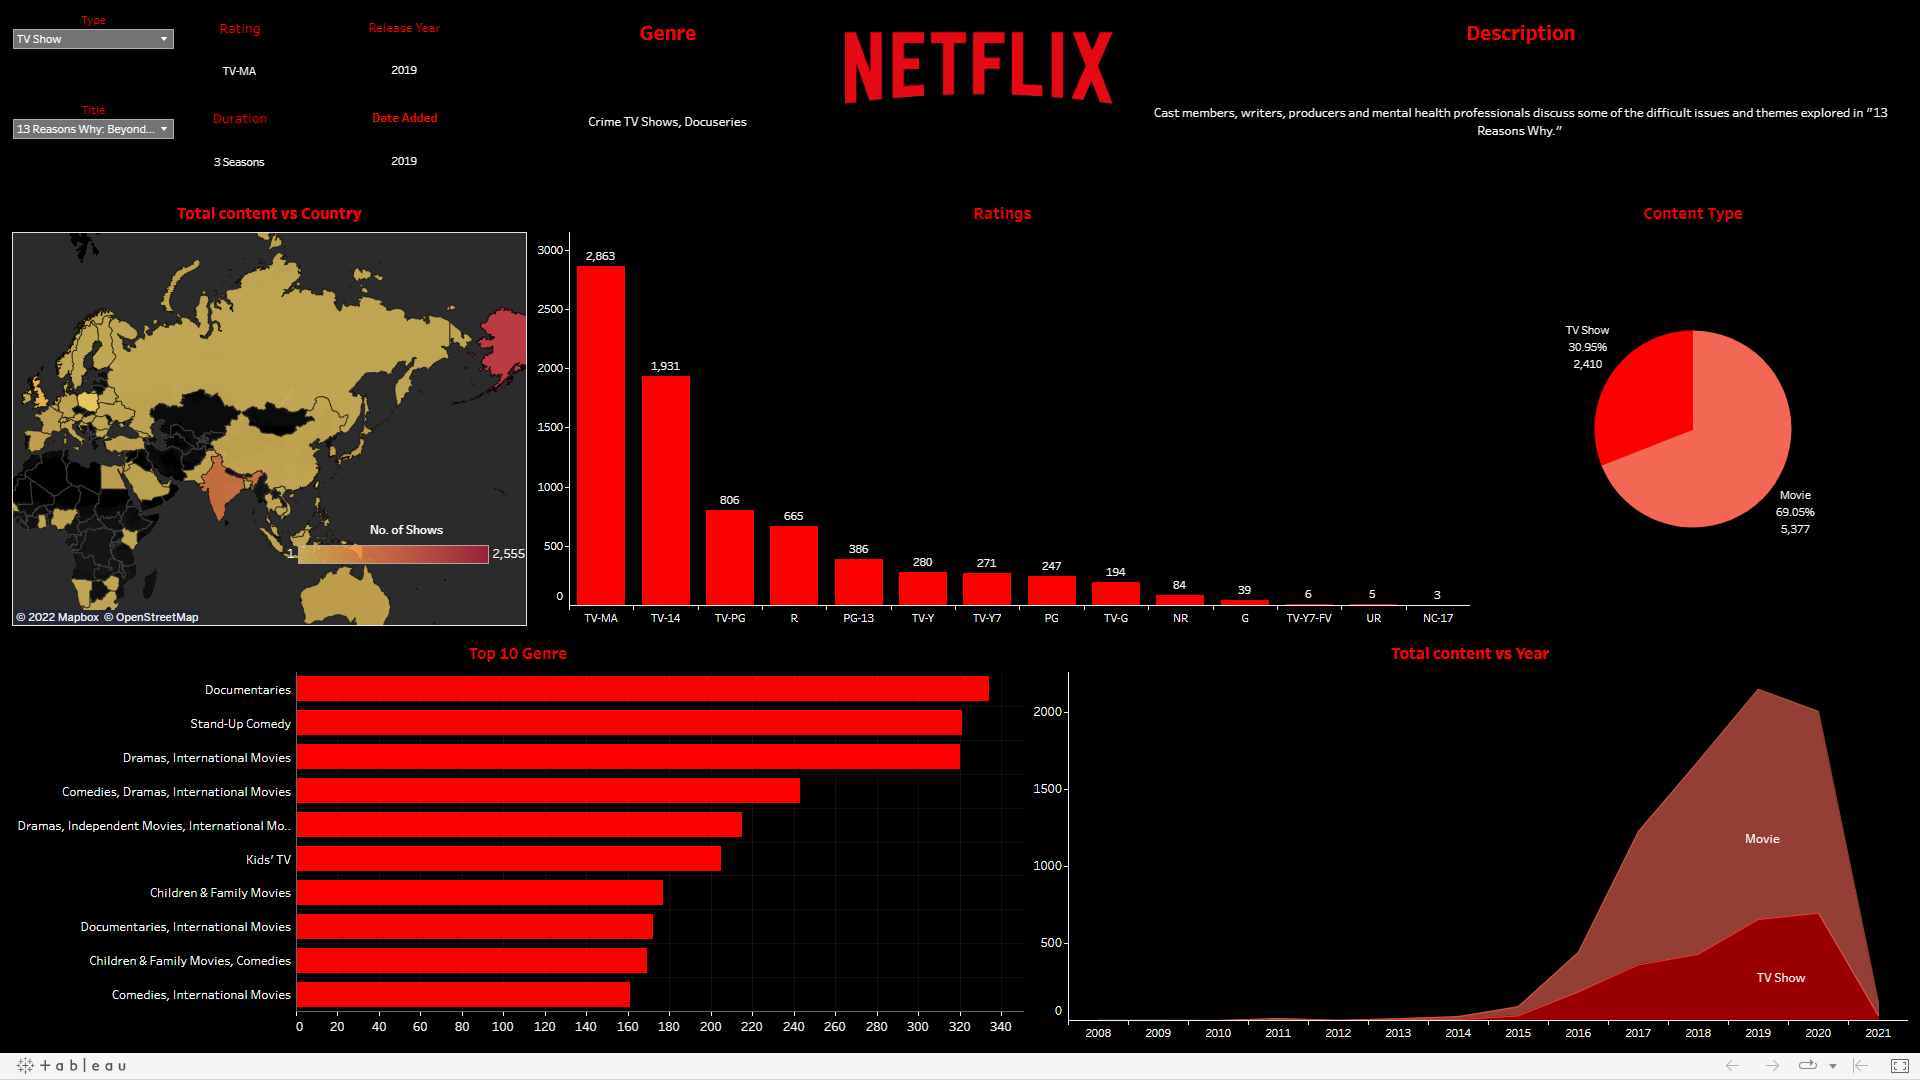

For interactive dashboard- [Click here](https://public.tableau.com/views/Netflixdasboard_16717379913640/NetflixDashboard?:language=en-US&:display_count=n&:origin=viz_share_link)  (please select fullscreen option given at bottom right corner of dashboard for better experience. )

In [40]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [41]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [42]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [45]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [46]:
Complete_columns_info(content_df)

 selected dataframe has 16 columns and 7787 rows


,No of Null Values,% of null values,No of unique values,Data Type
director,2389,30.7,4049,string
cast,718,9.2,6831,string
country,507,6.5,681,string
date_added,10,0.1,1512,datetime64[ns]
day_added,10,0.1,31,float64
year_added,10,0.1,14,float64
month_added,10,0.1,12,float64
rating,7,0.1,14,string
ratings_cat,7,0.1,4,category
show_id,0,0.0,7787,object


In [47]:
# Handling Missing Values & Missing Value Imputation
content_df['director'].fillna('unknown', inplace=True)
content_df['cast'].fillna('unknown', inplace=True)
content_df['country'].fillna('unknown', inplace=True)

In [48]:
content_df.dropna(subset=['date_added','day_added','year_added','month_added','rating','ratings_cat'],inplace=True)


In [49]:
content_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   category      
 2   title         7770 non-null   string        
 3   director      7770 non-null   string        
 4   cast          7770 non-null   string        
 5   country       7770 non-null   string        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   string        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   string        
 11  description   7770 non-null   string        
 12  day_added     7770 non-null   float64       
 13  year_added    7770 non-null   float64       
 14  month_added   7770 non-null   float64       
 15  ratings_cat   7770 non-null   category

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [50]:
# Handling Outliers & Outlier treatments


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [51]:
# Encode your categorical columns



#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [52]:
cluster_df = content_df[['title']]
cluster_df['cluster_data'] = (content_df['description'] + ' ' + content_df['listed_in'] + ' ' + content_df['director'] + ' ' + content_df['cast'] + ' ' + content_df['country'] + ' ' + content_df['rating']).astype(str)
cluster_df.set_index('title', inplace = True)
cluster_df.head()
     


,cluster_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...
23:59,"When an army recruit is found dead, his fellow..."
9,"In a postapocalyptic world, rag-doll robots hi..."
21,A brilliant group of students become card-coun...


#### 1. Expand Contraction

In [53]:
# Expand Contraction

#### 2. Lower Casing

In [54]:
# Lower Casing
cluster_df['cluster_data'] = cluster_df['cluster_data'].str.lower()

#### 3. Removing Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [55]:
# Remove URLs & Remove words and digits contain digits
# Remove punctuation from the text :

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string 
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
    
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)
cluster_df.head(5)
     


,cluster_data
title,
3%,in a future where the elite inhabit an island ...
7:19,after a devastating earthquake hits mexico cit...
23:59,when an army recruit is found dead his fellow ...
9,in a postapocalyptic world ragdoll robots hide...
21,a brilliant group of students become cardcount...


#### 5. Removing Stopwords & Removing White spaces

In [56]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
     

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
stop_words = set(stopwords.words('english'))


In [58]:
# Remove Stopwords
# Remove the stopwords :

def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stopwords)
cluster_df.cluster_data.head(2)
     

title
3%      future elite inhabit island paradise far crowd...
7:19    devastating earthquake hits mexico city trappe...
Name: cluster_data, dtype: object

> Stemming

In [59]:
# create an object of stemming function :

stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)
     

In [60]:
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stemming)
cluster_df.head(5)
     

,cluster_data
title,
3%,futur elit inhabit island paradis far crowd sl...
7:19,devast earthquak hit mexico citi trap survivor...
23:59,armi recruit found dead fellow soldier forc co...
9,postapocalypt world ragdol robot hide fear dan...
21,brilliant group student becom cardcount expert...


In [61]:
bag_of_words = cluster_df.cluster_data


In [62]:
content_df['Length(listed_in)'] = content_df['listed_in'].apply(lambda x: len(x))
content_df['Length(description)'] = content_df['description'].apply(lambda x: len(x))

content_df.head()
     

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added,ratings_cat,Length(listed_in),Length(description)
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14.0,2020.0,8.0,Adults,54,136
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23.0,2016.0,12.0,Adults,28,148
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20.0,2018.0,12.0,Adults,35,149
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16.0,2017.0,11.0,Teens,56,145
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,1.0,Teens,6,143


#### 6. Rephrase Text

In [63]:
# Rephrase Text

#### 7. Tokenization

In [64]:
# Tokenization

#### 8. Text Normalization

In [65]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [66]:
# POS Taging

#### 10. Text Vectorization

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [67]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [68]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [69]:
# Transform Your data
X_features = content_df[['Length(description)','Length(listed_in)']]
stdscaler = preprocessing.StandardScaler()
X_features.describe()

,Length(description),Length(listed_in)
count,7770.000000,7770.000000
mean,143.101287,33.372458
std,10.618177,15.018409
min,61.000000,6.000000
25%,140.000000,23.000000
50%,146.000000,34.000000
75%,149.000000,47.000000
max,248.000000,79.000000


### 6. Data Scaling

In [70]:
# Scaling your data
X_rescale=stdscaler.fit_transform(X_features)
X=X_rescale
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]

In [71]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 2)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
     

For n_clusters = 2, silhouette score is 0.39416413076348666
For n_clusters = 3, silhouette score is 0.4349442026264354
For n_clusters = 4, silhouette score is 0.44761470302252365
For n_clusters = 5, silhouette score is 0.4179944659463425
For n_clusters = 6, silhouette score is 0.4263356310272302
For n_clusters = 7, silhouette score is 0.43178905879748486
For n_clusters = 8, silhouette score is 0.4201191337864045
For n_clusters = 9, silhouette score is 0.3937780264285086
For n_clusters = 10, silhouette score is 0.39781187166637944
For n_clusters = 11, silhouette score is 0.3928445998788524
For n_clusters = 12, silhouette score is 0.3973934638235282
For n_clusters = 13, silhouette score is 0.3935010081921302
For n_clusters = 14, silhouette score is 0.3949537328459137
For n_clusters = 15, silhouette score is 0.4025776995380797


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [72]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [73]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [74]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 - K means

In [75]:
# ML Model - 1 K means
k_clusters = 4

# Fit the Algorithm
#Clustering the dataset with the optimal number of clusters :

model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=42)
model.fit(X)
# Predict on the model


KMeans(max_iter=600, n_clusters=4, random_state=42, tol=1e-06)

In [76]:
#Predict the clusters and evaluate the silhouette score :

clusters = model.predict(X)
score = silhouette_score(X, clusters)
print("Silhouette score is {}".format(score))
     

Silhouette score is 0.44761470302252365


In [77]:
#Adding a seperate column for the clusters L:

content_df["Cluster Label"] = clusters
content_df.head()
     

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added,ratings_cat,Length(listed_in),Length(description),Cluster Label
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14.0,2020.0,8.0,Adults,54,136,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23.0,2016.0,12.0,Adults,28,148,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20.0,2018.0,12.0,Adults,35,149,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16.0,2017.0,11.0,Teens,56,145,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,1.0,Teens,6,143,0


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [78]:
# Visualizing evaluation Metric Score chart
temp = pd.DataFrame(silhouette_score_ , columns = ["n clusters" , "silhouette score"])
temp = temp.sort_values( "silhouette score" , ascending = False )
temp.head(15)
     

,n clusters,silhouette score
2,4,0.45
1,3,0.43
4,6,0.43
5,7,0.43
3,5,0.42
6,8,0.42
8,10,0.40
10,12,0.40
13,15,0.40
0,2,0.39


#### 2. Cross- Validation & Hyperparameter Tuning

In [79]:
content_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   show_id              7770 non-null   object        
 1   type                 7770 non-null   category      
 2   title                7770 non-null   string        
 3   director             7770 non-null   string        
 4   cast                 7770 non-null   string        
 5   country              7770 non-null   string        
 6   date_added           7770 non-null   datetime64[ns]
 7   release_year         7770 non-null   int64         
 8   rating               7770 non-null   string        
 9   duration             7770 non-null   object        
 10  listed_in            7770 non-null   string        
 11  description          7770 non-null   string        
 12  day_added            7770 non-null   float64       
 13  year_added           7770 non-nul

For n_clusters = 2 The average silhouette_score is : 0.39416413076348666
For n_clusters = 3 The average silhouette_score is : 0.43498587872384165
For n_clusters = 4 The average silhouette_score is : 0.4474346057530305
For n_clusters = 5 The average silhouette_score is : 0.4179451658408099
For n_clusters = 6 The average silhouette_score is : 0.42784748146378654
For n_clusters = 7 The average silhouette_score is : 0.43178905879748486
For n_clusters = 8 The average silhouette_score is : 0.42222443355937683
For n_clusters = 9 The average silhouette_score is : 0.3956524074165999
For n_clusters = 10 The average silhouette_score is : 0.3949818235709966
For n_clusters = 11 The average silhouette_score is : 0.39231962393545666
For n_clusters = 12 The average silhouette_score is : 0.3923191080640547
For n_clusters = 13 The average silhouette_score is : 0.3907297123344184
For n_clusters = 14 The average silhouette_score is : 0.3982108256771202
For n_clusters = 15 The average silhouette_score is :

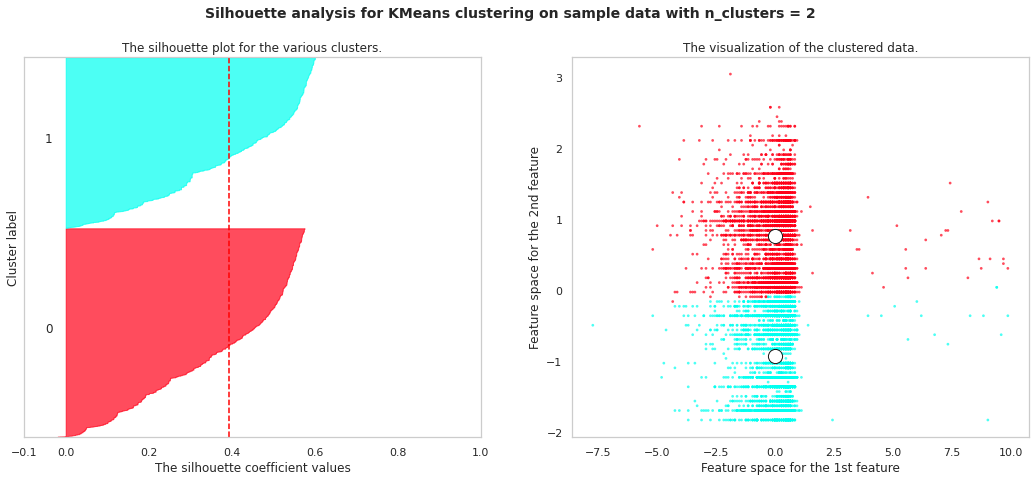

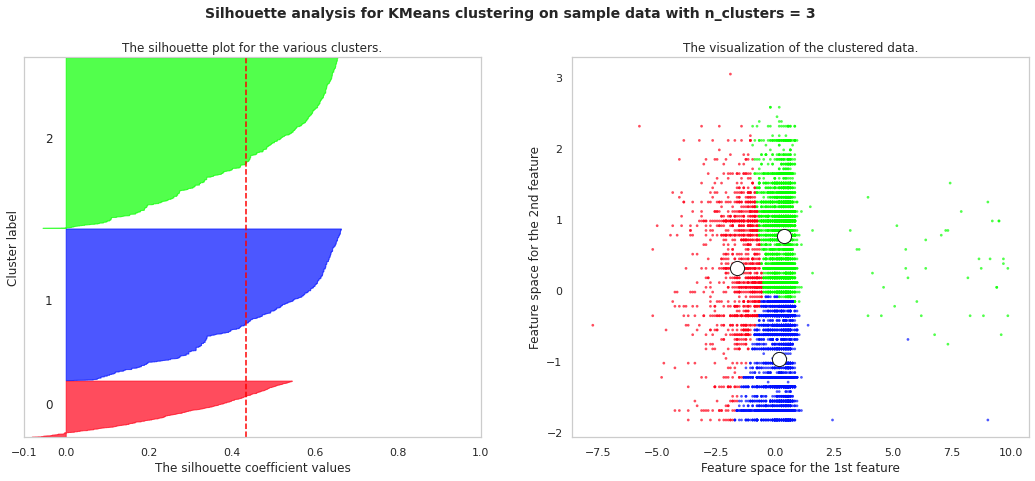

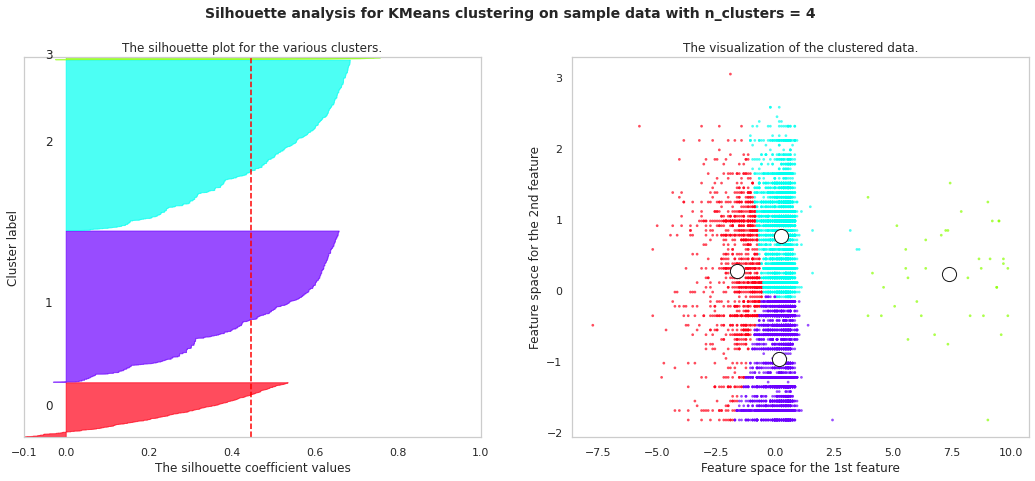

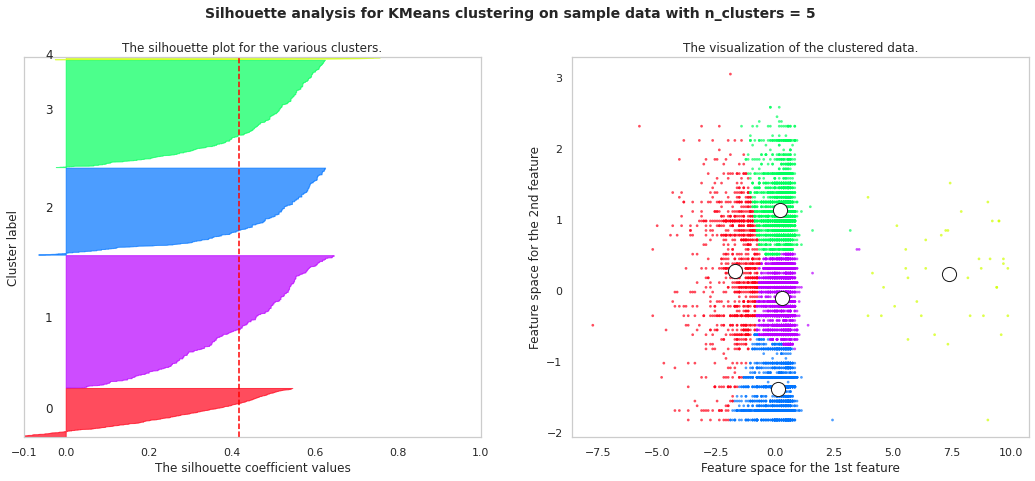

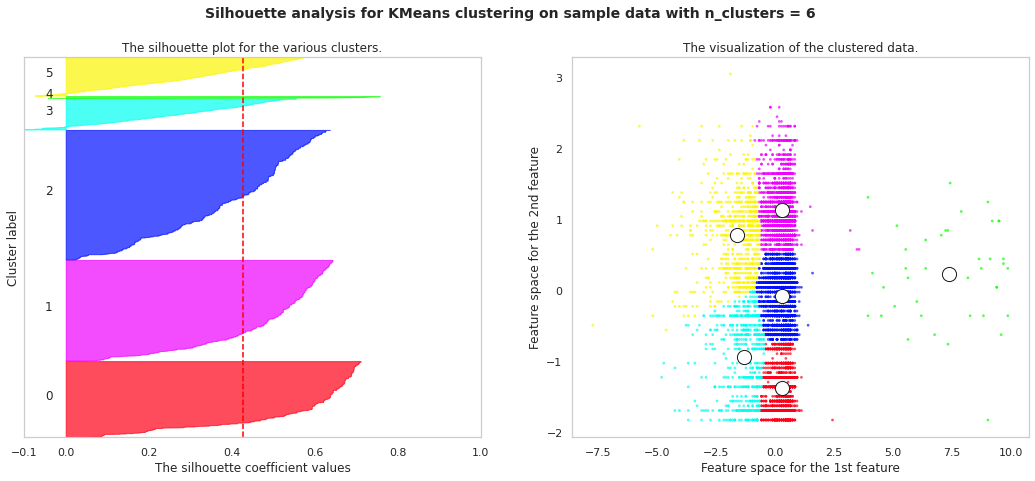

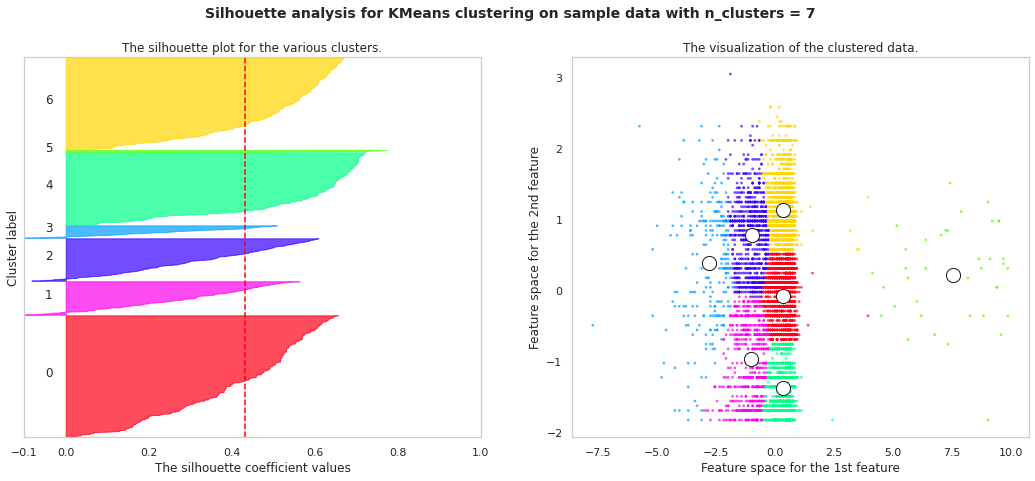

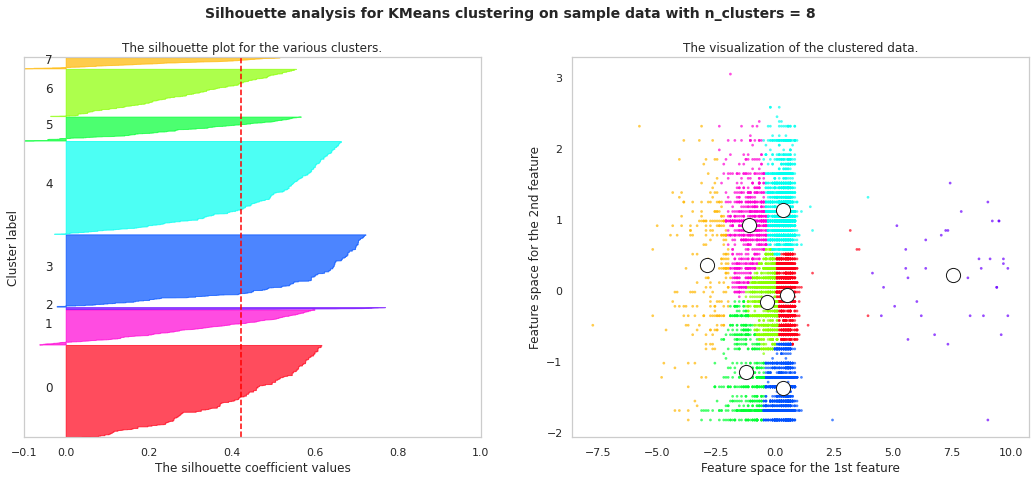

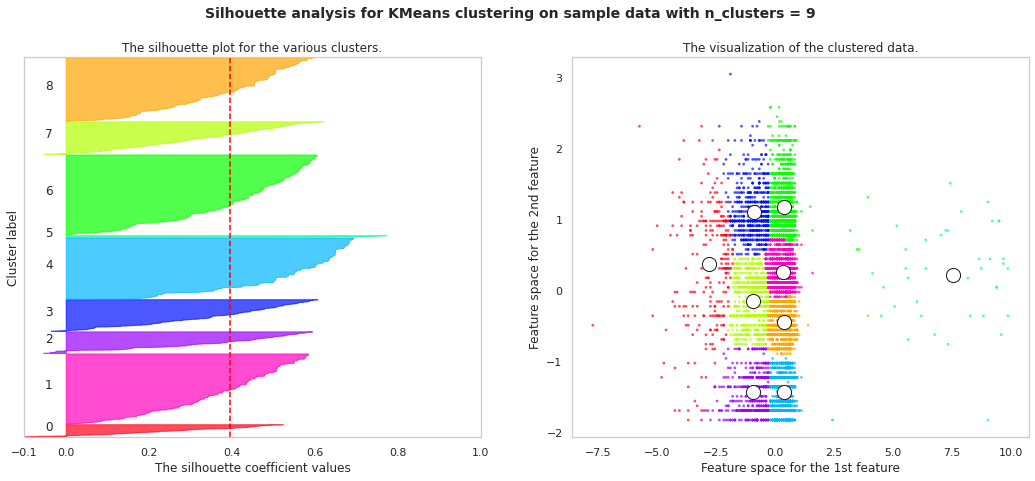

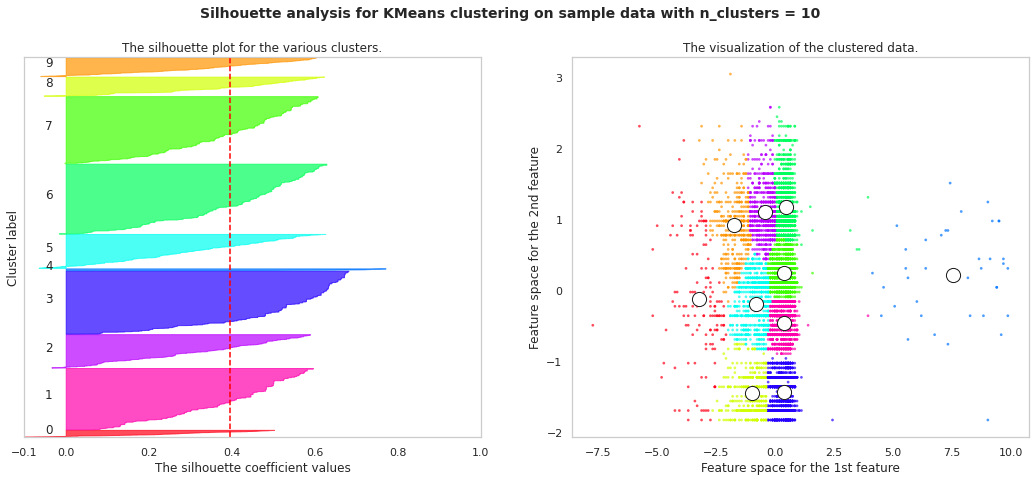

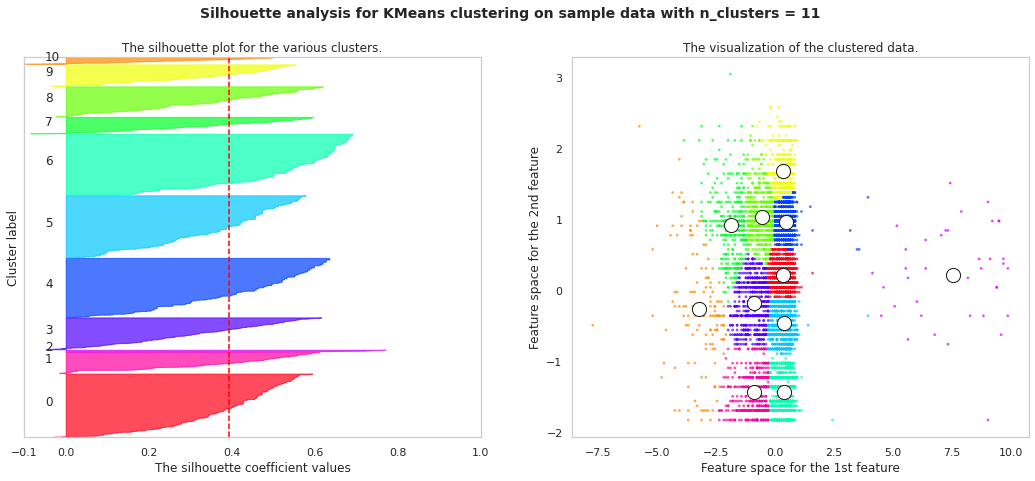

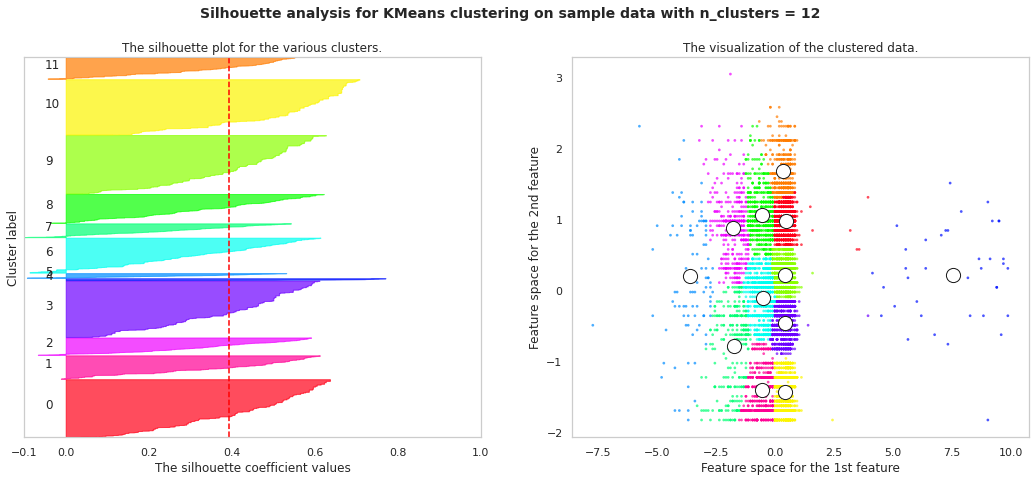

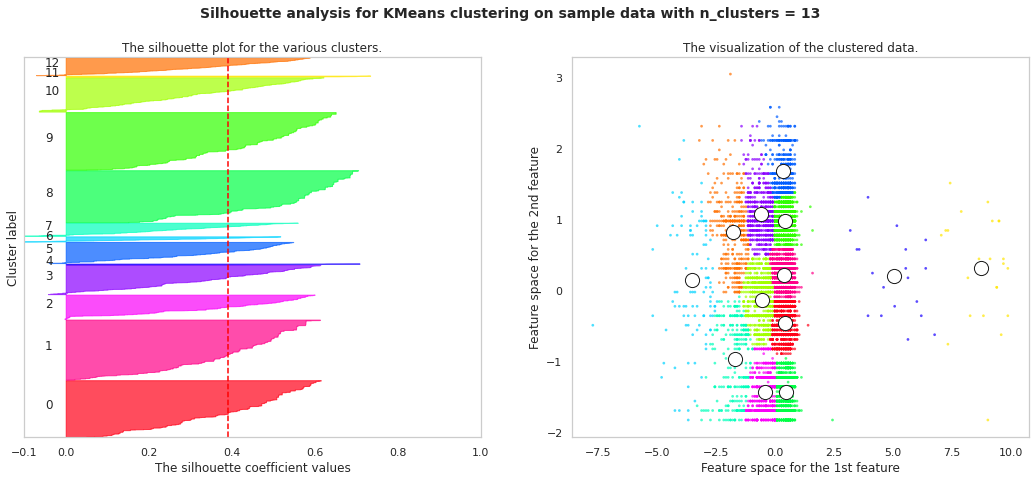

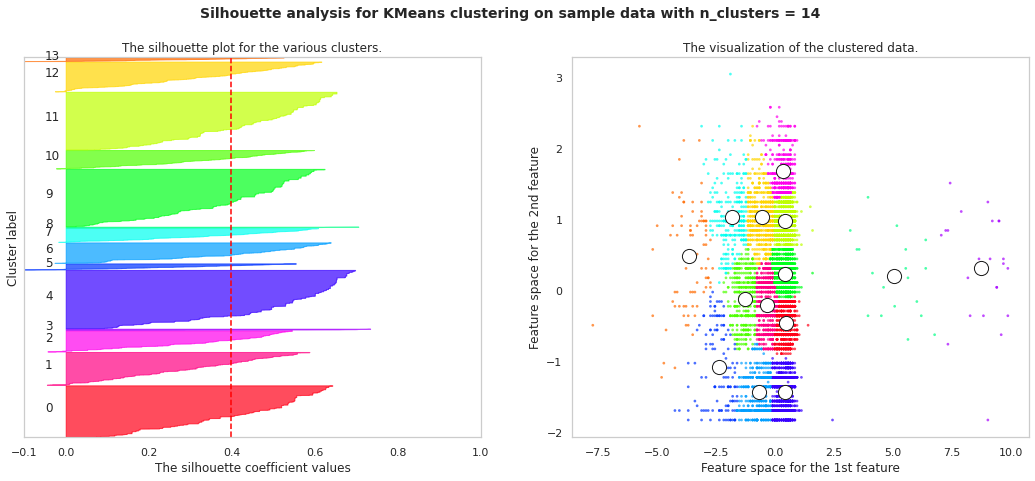

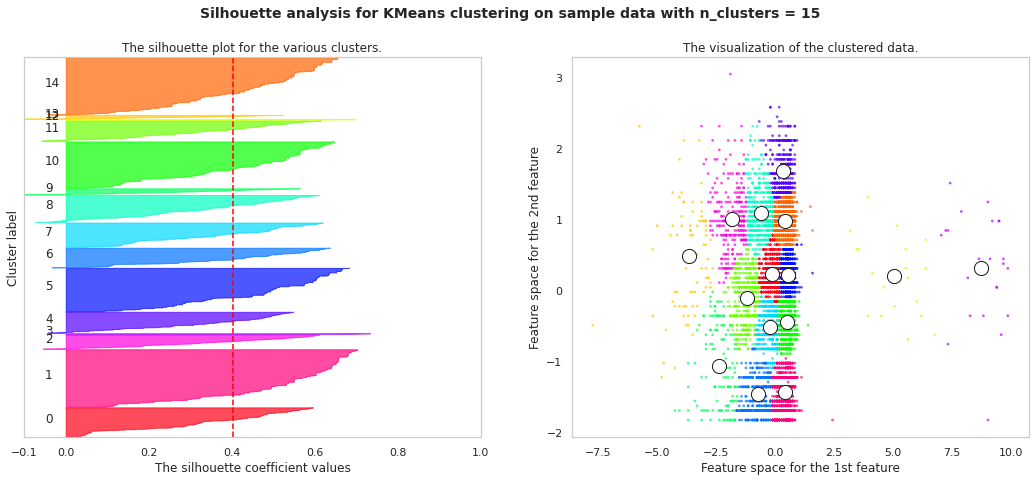

In [80]:
range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns :

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)


    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]

    ax1.set_xlim([-0.1, 1])

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.

    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    

    # Compute the silhouette scores for each sample :

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them :

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.hsv_r(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle :

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    #ax1.set_facecolor("white")
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.grid(False)

    # The vertical line for average silhouette score of all the values :

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed :

    colors = cm.hsv_r(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters :

    centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers :

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

  

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    ax2.grid(False)
    #ax2.set_facecolor("white") :
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [81]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [82]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

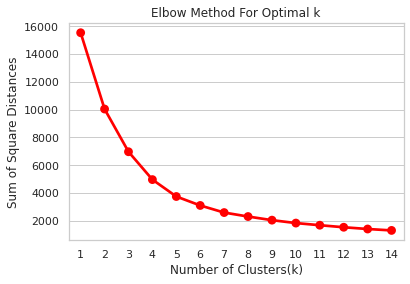

In [83]:
# ML Model - 3 Implementation
sum_of_square_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_square_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters :

sns.pointplot(x = list(sum_of_square_dist.keys()), y = list(sum_of_square_dist.values()),color="red")
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Fit the Algorithm

# Predict on the model

* 5 is optimum 

In [111]:
kmeans = KMeans(n_clusters = 6 )
kmeans.fit(X)
y_kmeans= kmeans.predict(X)
     

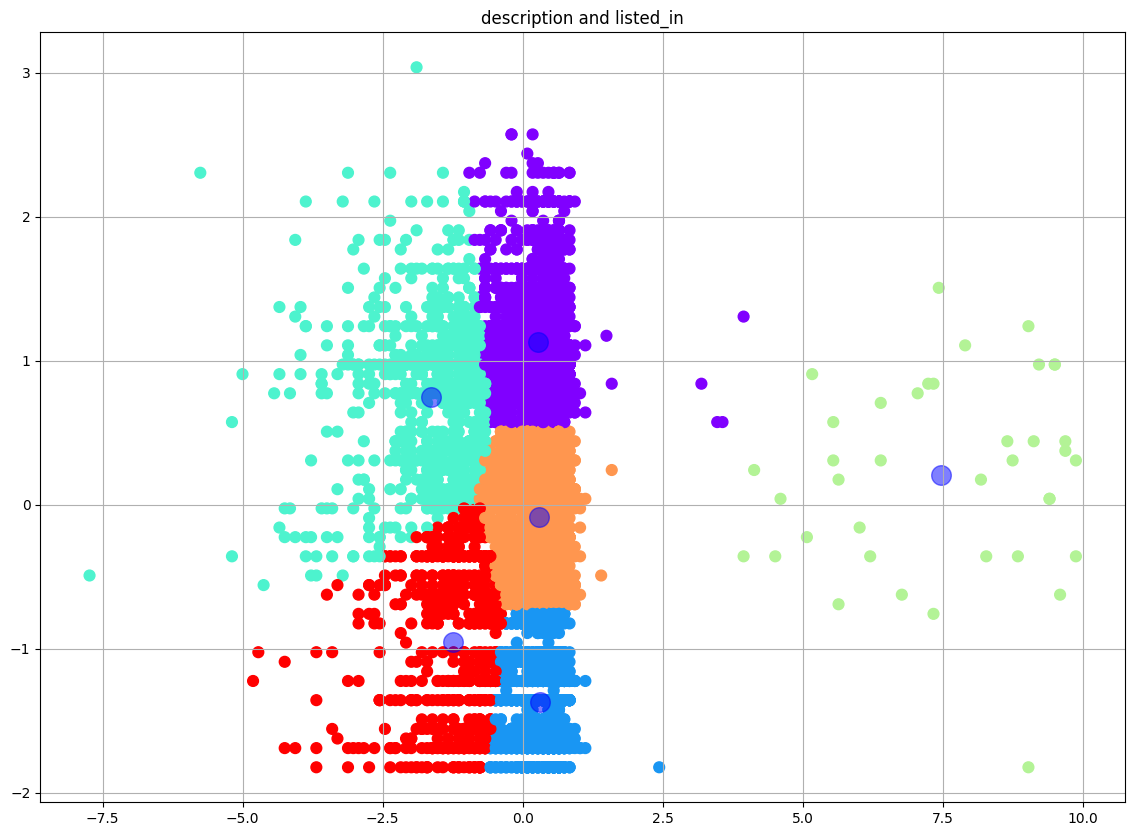

In [112]:
plt.figure(figsize=(14,10))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=60, cmap='rainbow')
plt.grid(b=None)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)
     


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [86]:
# Visualizing evaluation Metric Score chart


#### 2. Cross- Validation & Hyperparameter Tuning

In [87]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

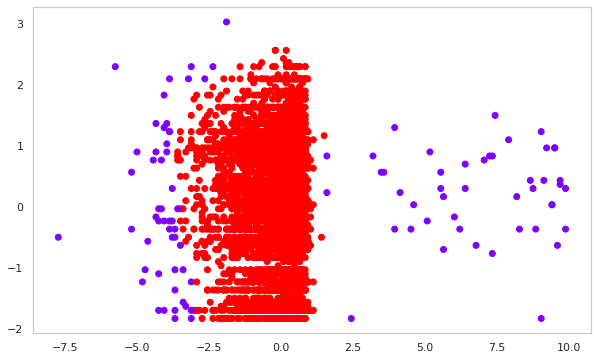

In [88]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=20).fit_predict(X)
plt.figure(figsize=(10,6))
plt.grid(b=None)
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')

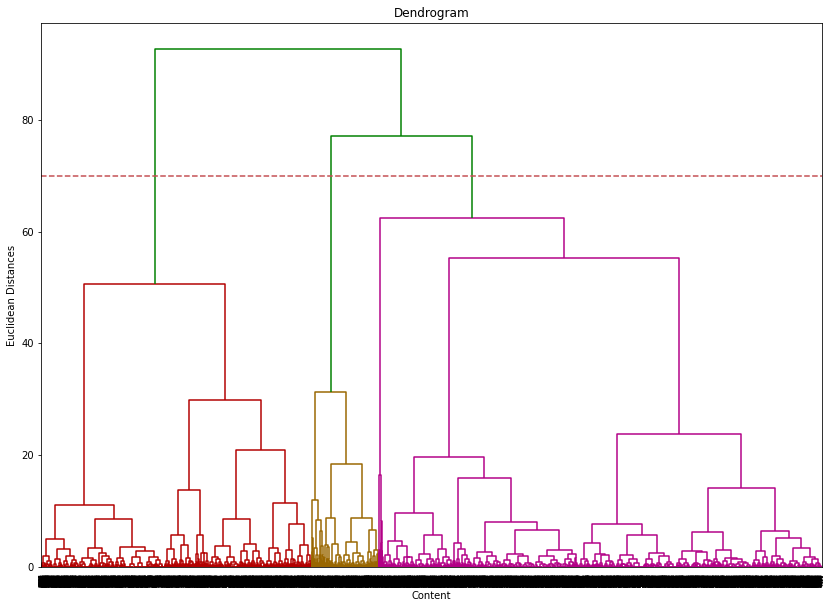

In [89]:
#  importing sch :

import scipy.cluster.hierarchy as sch
plt.figure(figsize=(14,10))
plt.style.use('default')
sch.set_link_color_palette(['#b30000','#996600', '#b30086'])
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'),above_threshold_color="green")
plt.axhline(y=70, color='r', linestyle='--')


 # find largest vertical distance we can make without crossing any other horizontal line :
 
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show()

In [90]:
#import Agglomerative Clustering :

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
     


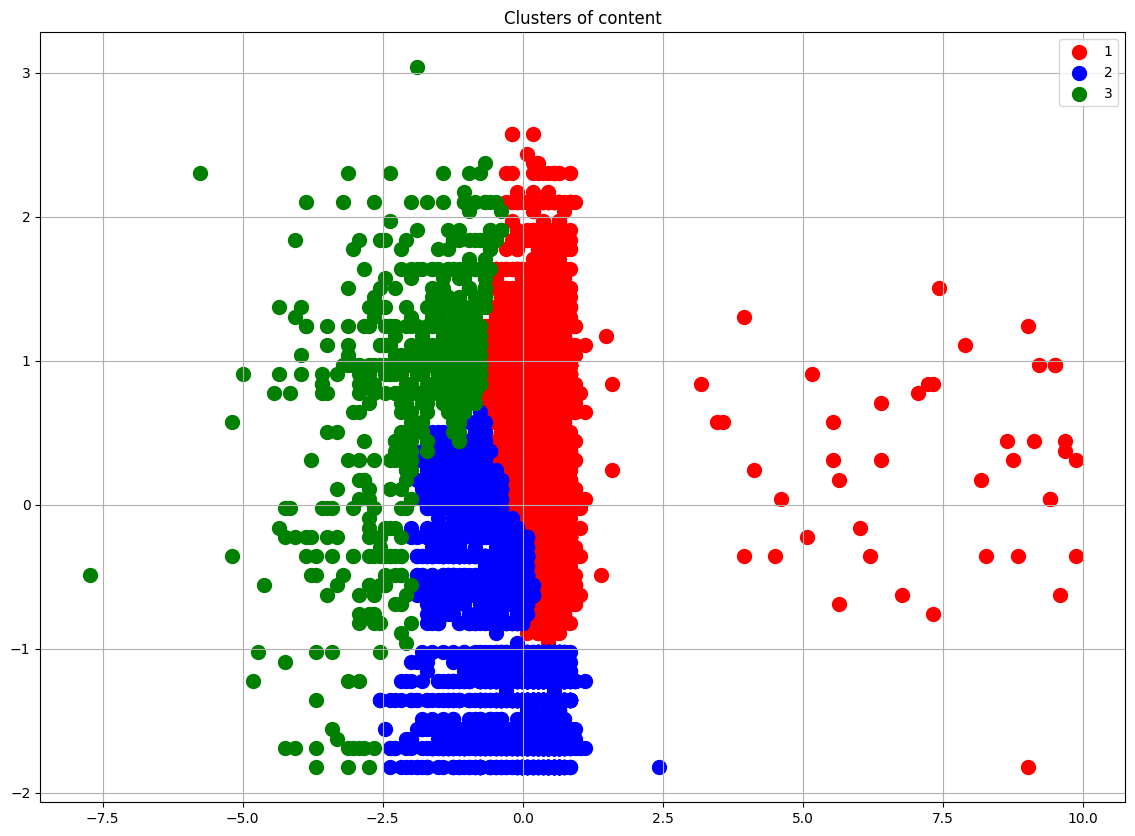

In [91]:
# Visualizing the clusters :

plt.figure(figsize=(14,10))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')
plt.grid(b=None)

plt.title('Clusters of content')

plt.legend()
plt.show()
     

In [92]:
# Run TF IDF Vectorizer on the text data :

from sklearn.feature_extraction.text import TfidfVectorizer

# sublinear_df is set to True to use a logarithmic form for frequency
# min_df is the minimum numbers of documents a word must be present in to be kept
# norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1
# ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams
# stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features

vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english')
X_vc = vectorizer.fit_transform(content_df["listed_in"])

pd.DataFrame(X_vc.toarray(), columns=vectorizer.get_feature_names()).head()
     

,action,action adventure,adventure,adventure anime,adventure children,adventure classic,adventure comedies,adventure dramas,adventure horror,adventure independent,...,tv dramas,tv horror,tv korean,tv mysteries,tv romantic,tv sci,tv shows,tv spanish,tv thrillers,tv tv
0,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.228523,0.0,0.0,0.0,0.0,0.378081,0.17468,0.0,0.0,0.0
1,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
2,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
3,0.21135,0.21135,0.21135,0.0,0.0,0.0,0.0,0.0,0.0,0.476294,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
4,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0


In [93]:
#Function for getting the most common words in each cluster :

def get_common_words_cluster(vc_arr, y_pred, n_feats):
    labels = np.unique(y_pred)
    dfs = []
    for label in labels:

      # indices for each cluster :
      id_temp = np.where(y_pred==label)

      # returns average score across cluster  :
      x_means = np.mean(vc_arr[id_temp], axis = 0) 
      
      # indices with top 20 scores :
      sorted_means = np.argsort(x_means)[::-1][:n_feats] 
      features = vectorizer.get_feature_names()
      common_words = [(features[i], x_means[i]) for i in sorted_means]
      df = pd.DataFrame(common_words, columns = ['words', 'count'])
      dfs.append(df)
    return dfs
     

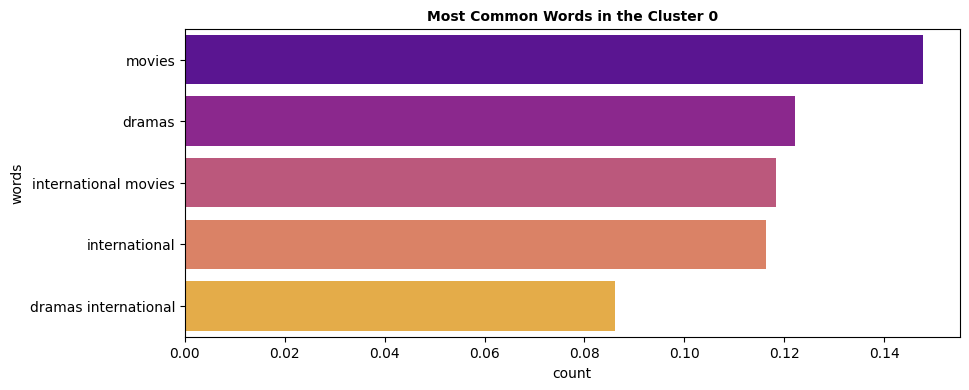

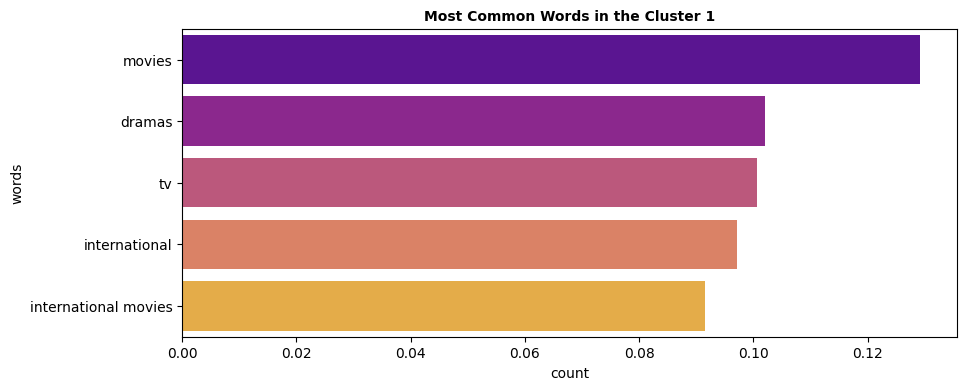

In [94]:
#Function for data visualization of the most commin words in each cluster :

def plot_common_words(dfs, num):
    for i in range(0, len(dfs)):
        plt.figure(figsize=(10, 4))
        plt.title(("Most Common Words in the Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'count' , y = 'words', orient = 'h' , data = dfs[i][:num],palette = 'plasma')
dfs = get_common_words_cluster(X_vc.toarray(), y_pred, 5)
plot_common_words(dfs, 5)
     

In [95]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()
for i in range(k_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :k_clusters]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))
     

Cluster 0: action action adventure
Cluster 1: action adventure action
Cluster 2: action adventure action
Cluster 3: action action adventure


In [96]:
content_df['cluster'] = kmeans.labels_
content_df.head()
     

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added,ratings_cat,Length(listed_in),Length(description),Cluster Label,cluster
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14.0,2020.0,8.0,Adults,54,136,1,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23.0,2016.0,12.0,Adults,28,148,0,3
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20.0,2018.0,12.0,Adults,35,149,1,3
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16.0,2017.0,11.0,Teens,56,145,1,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,1.0,Teens,6,143,0,1


In [97]:
#Function for getting the some of the same cluster item details :

def find_same_cluster_items(name_nf):
  inp_nf = content_df.loc[content_df['title'].str.lower() == name_nf.lower()]
  num = inp_nf.cluster.iloc[0]
  type_nf = inp_nf.type.iloc[0]
  temp_df = content_df.loc[(content_df['cluster'] == num) & (content_df['type']==type_nf)]
  temp_df = temp_df.sample(10)
  
  print("The cluster number is {}".format(num))
   #print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score)) :

  return list(temp_df['title'])
     

In [98]:
find_same_cluster_items('Indiana Jones and the Last Crusade')


The cluster number is 0


['Vettai',
 'Lupin the 3rd: The Castle of Cagliostro: Special Edition',
 'Come Sunday',
 'Happy Old Year',
 'Jab We Met',
 'The Texas Chainsaw Massacre',
 'Mi amigo Alexis',
 'Baahubali: The Beginning (Tamil Version)',
 'Tottaa Pataaka Item Maal',
 "Freaks – You're One of Us"]

> recommendation system

In [99]:
  
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

     


In [100]:
#Replace NaN with an empty string, since the converter cannot deal with integer/float
content_df['description'] = content_df['description'].fillna('')
     

In [101]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#get the tf-idf scores
#create TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(content_df['description'])

#shape of tfidf_matrix
tfidf_matrix.shape

(7770, 17888)

In [102]:
pd.DataFrame(tfidf_matrix[0].T.todense(), index=tfidf.get_feature_names(), columns=["tf-idf score"])


,tf-idf score
000,0.0
007,0.0
009,0.0
10,0.0
100,0.0
...,...
ömer,0.0
über,0.0
łukasz,0.0
ōarai,0.0


In [103]:
#CountVectorizer: Convert a collection of text documents to a matrix of token counts
#TfidfTransformer: Transform a count matrix to a normalized tf or tf-idf representation

from sklearn.pipeline import Pipeline

pipe = Pipeline([('cv', CountVectorizer(stop_words='english')),
                ('tfid', TfidfTransformer())]).fit(content_df['description'])

print("CountVectorizer_matrix: {}".format(pipe['cv'].transform(content_df['description']).toarray()))
print("CountVectorizer_matrix: {}".format(pipe['tfid'].idf_))
     

CountVectorizer_matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
CountVectorizer_matrix: [6.40280607 8.34871622 9.26500695 ... 9.26500695 9.26500695 9.26500695]


In [104]:
#The lower the IDF value of a word, the less unique it is to any particular document
pd.DataFrame(pipe['tfid'].idf_, index=pipe['cv'].get_feature_names(), columns=['idf_weights'])
     

,idf_weights
000,6.402806
007,8.348716
009,9.265007
10,6.244582
100,7.250104
...,...
ömer,9.265007
über,8.859542
łukasz,9.265007
ōarai,9.265007


* cosine similarity

In [105]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)

In [106]:
programme_list=content_df['title'].to_list()


In [107]:
def recommend(title, cosine_similarity=cosine_sim):
    index = programme_list.index(title)
    sim_score = list(enumerate(cosine_sim[index]))
    sim_score = sorted(sim_score, key= lambda x: x[1], reverse=True)[1:11] #position 0 is the movie itself, thus exclude
    recommend_index = [i[0] for i in sim_score]
    rec_movie = content_df['title'].iloc[recommend_index]
    rec_score = [round(i[1],4) for i in sim_score]
    rec_table = pd.DataFrame(list(zip(rec_movie,rec_score)), columns=['Recommend programme','Similarity(0-1)'])
    return rec_table

In [120]:
recommend("3 Idiots")


,Recommend programme,Similarity(0-1)
0,College Romance,0.2317
1,Engineering Girls,0.1727
2,Candy Jar,0.1525
3,Mr. Young,0.1512
4,100 Things to do Before High School,0.1478
5,Pahuna,0.1470
6,Best Neighbors,0.1466
7,Be with Me,0.1364
8,Moms at War,0.1346
9,Lovesong,0.1287


In [118]:
content_df.head(100)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added,ratings_cat,Length(listed_in),Length(description),Cluster Label,cluster
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14.0,2020.0,8.0,Adults,54,136,1,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23.0,2016.0,12.0,Adults,28,148,0,3
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20.0,2018.0,12.0,Adults,35,149,1,3
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16.0,2017.0,11.0,Teens,56,145,1,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,1.0,Teens,6,143,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,s97,Movie,3 Days to Kill,McG,"Kevin Costner, Amber Heard, Hailee Steinfeld, ...","United States, France, Serbia",2020-12-01,2014,PG-13,117 min,Action & Adventure,A terminally ill secret agent accepts a risky ...,1.0,2020.0,12.0,Teens,18,148,0,1
97,s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",unknown,2019-12-31,2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...,31.0,2019.0,12.0,Adults,39,148,1,3
98,s99,Movie,3 Generations,Gaby Dellal,"Elle Fanning, Naomi Watts, Susan Sarandon, Tat...",United States,2017-08-28,2015,PG-13,92 min,"Dramas, LGBTQ Movies",When teenage Ray begins transitioning from fem...,28.0,2017.0,8.0,Teens,20,147,0,1
99,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,2019-01-05,2016,TV-PG,124 min,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...,5.0,2019.0,1.0,Older Kids,43,139,1,0


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [109]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [110]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***